In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import regularizers
import tensorflow as tf
import pandas as pd
import librosa
from tqdm import tqdm_notebook as tqdm
import pickle
%matplotlib inline

Using TensorFlow backend.


In [2]:
data = pd.read_csv("../Utilities/data_note.tsv", sep="\t", header=0)

In [3]:
data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x15991,x15992,x15993,x15994,x15995,x15996,x15997,x15998,x15999,Note
0,0.001465,0.001681,0.005331,-0.002838,-0.015286,-0.009736,0.015490,0.010337,0.001405,0.002371,...,0.003449,0.003488,0.001495,-0.001752,-0.002831,-0.002337,-0.002936,-0.005293,-0.007221,C#3
1,-0.008995,-0.013210,-0.014460,-0.016820,-0.016346,-0.013873,-0.015907,-0.014268,-0.007894,-0.003954,...,-0.017439,-0.021490,-0.023198,-0.019781,-0.015293,-0.012494,-0.012988,-0.014049,-0.012630,D3
2,-0.009459,-0.008396,-0.008832,-0.012935,-0.010718,-0.002320,-0.002686,-0.000303,0.002634,0.000839,...,-0.001679,-0.001041,-0.000368,0.002192,0.005376,0.007840,0.006027,0.003115,0.003368,D#3
3,0.009730,0.016409,0.019472,0.015838,0.014779,0.016792,0.015904,0.019331,0.021950,0.020994,...,-0.005104,-0.009846,-0.014612,-0.016278,-0.014461,-0.012089,-0.009292,-0.008961,-0.012282,E3
4,-0.016608,-0.018866,-0.018244,-0.014823,-0.010421,-0.010667,-0.005970,-0.000487,-0.005703,-0.009161,...,-0.017657,-0.017786,-0.018655,-0.018373,-0.018204,-0.018803,-0.017219,-0.015150,-0.011934,F3


In [4]:
data["Note"] = librosa.note_to_midi(data["Note"]) - 49

In [5]:
data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x15991,x15992,x15993,x15994,x15995,x15996,x15997,x15998,x15999,Note
0,0.001465,0.001681,0.005331,-0.002838,-0.015286,-0.009736,0.015490,0.010337,0.001405,0.002371,...,0.003449,0.003488,0.001495,-0.001752,-0.002831,-0.002337,-0.002936,-0.005293,-0.007221,0
1,-0.008995,-0.013210,-0.014460,-0.016820,-0.016346,-0.013873,-0.015907,-0.014268,-0.007894,-0.003954,...,-0.017439,-0.021490,-0.023198,-0.019781,-0.015293,-0.012494,-0.012988,-0.014049,-0.012630,1
2,-0.009459,-0.008396,-0.008832,-0.012935,-0.010718,-0.002320,-0.002686,-0.000303,0.002634,0.000839,...,-0.001679,-0.001041,-0.000368,0.002192,0.005376,0.007840,0.006027,0.003115,0.003368,2
3,0.009730,0.016409,0.019472,0.015838,0.014779,0.016792,0.015904,0.019331,0.021950,0.020994,...,-0.005104,-0.009846,-0.014612,-0.016278,-0.014461,-0.012089,-0.009292,-0.008961,-0.012282,3
4,-0.016608,-0.018866,-0.018244,-0.014823,-0.010421,-0.010667,-0.005970,-0.000487,-0.005703,-0.009161,...,-0.017657,-0.017786,-0.018655,-0.018373,-0.018204,-0.018803,-0.017219,-0.015150,-0.011934,4


In [6]:
def create_xy(df, target_column):
    return df.drop(target_column, axis=1), df[target_column]

def split_data(df, target_column):
    X_train, y_train = create_xy(df.sample(round(0.8*df.shape[0])), target_column)
    df = df.drop(X_train.index)
    X_val, y_val = create_xy(df.sample(round(0.5*df.shape[0])), target_column)
    df = df.drop(X_val.index)
    X_test, y_test = create_xy(df, target_column)
    return X_train, y_train, X_val, y_val, X_test, y_test

In [7]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(data, "Note")

In [8]:
model = keras.Sequential([
    keras.layers.Dense(256, input_shape=(16000,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(35, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(X_train, y_train, epochs=5, verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 2s - loss: 3.1651 - acc: 0.4000
Epoch 2/5
 - 1s - loss: 1.7264 - acc: 0.8071
Epoch 3/5
 - 1s - loss: 0.9732 - acc: 0.8696
Epoch 4/5
 - 1s - loss: 0.5964 - acc: 0.9179
Epoch 5/5
 - 1s - loss: 0.3502 - acc: 0.9786


In [11]:
val_loss, val_acc = model.evaluate(X_val, y_val)

70/70 [==============================] - ETA:  - 0s 559us/step


In [12]:
print('Cross-validation accuracy:', val_acc)

Cross-validation accuracy: 0.7285714302744184


In [13]:
predictions = np.argmax(model.predict(X_val), axis=1)

for i, j in zip(predictions, y_val):
    print("{:>8} {:>8}".format(i, j))

      13       13
      18       18
      20        8
      29       26
       2        2
      13       13
      32       32
       9        9
      10       10
       3        3
       3        3
      12       12
      29       29
      23       11
       9       28
      30       18
      18       18
      23       23
      18       18
      33       33
       5        5
       4        4
       9       33
       2        2
      14        2
       7        7
      11       11
      11       11
      14       14
      16       16
      15       27
       9       28
       7        7
      16       16
      22       34
       2        2
      21       33
       6        6
       4        4
      15       15
      17       17
       2        2
       8        8
      12        0
       3        3
      12        0
      23       23
      14       14
       0        0
      15       15
       7        7
      19        7
      29       14
      31       31
      13       25
       0  

70/70 [==============================] - ETA:  - 1s 8ms/step



Text(0, 0.5, 'Model score')

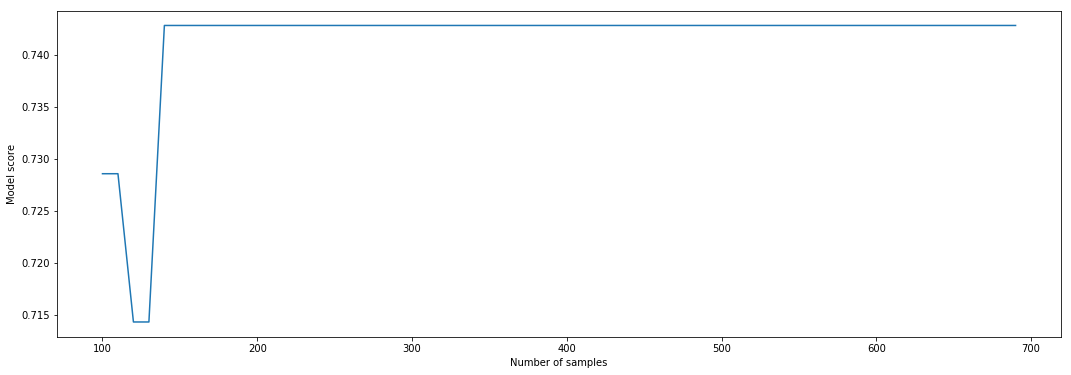

In [14]:
n_samples = []
scores = []

for i in tqdm(range(100, data.shape[0], 10)):
    n_samples.append(i)
    x = X_train.sample(frac=1).iloc[:i]
    y = y_train.sample(frac=1).iloc[:i]
    model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=5, verbose=0)
    val_loss, val_acc = model.evaluate(X_val, y_val)
    scores.append(val_acc)

plt.figure(figsize=(18,6))
plt.plot(n_samples, scores)
plt.xlabel("Number of samples")
plt.ylabel("Model score")

In [15]:
data = pd.read_pickle("../Utilities/data-FL-Ivy.pkl")

In [16]:
data["Note"] = librosa.note_to_midi(data["Note"]) - 49

In [17]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(data, "Note")

In [18]:
model = keras.Sequential([
    keras.layers.Dense(256, input_shape=(16000,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(35, activation=tf.nn.softmax)
])

In [19]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.fit(X_train, y_train, epochs=20, verbose=2)

Epoch 1/20
 - 5s - loss: 3.2645 - acc: 0.3214
Epoch 2/20
 - 3s - loss: 2.4170 - acc: 0.6310
Epoch 3/20
 - 3s - loss: 1.8915 - acc: 0.7577
Epoch 4/20
 - 3s - loss: 1.4796 - acc: 0.8357
Epoch 5/20
 - 3s - loss: 1.1875 - acc: 0.8786
Epoch 6/20
 - 3s - loss: 0.9602 - acc: 0.9107
Epoch 7/20
 - 3s - loss: 0.8246 - acc: 0.9214
Epoch 8/20
 - 3s - loss: 0.6846 - acc: 0.9321
Epoch 9/20
 - 3s - loss: 0.5736 - acc: 0.9476
Epoch 10/20
 - 3s - loss: 0.4964 - acc: 0.9595
Epoch 11/20
 - 3s - loss: 0.4430 - acc: 0.9690
Epoch 12/20
 - 3s - loss: 0.4275 - acc: 0.9655
Epoch 13/20
 - 3s - loss: 0.3667 - acc: 0.9690
Epoch 14/20
 - 3s - loss: 0.3247 - acc: 0.9774
Epoch 15/20
 - 3s - loss: 0.3525 - acc: 0.9714
Epoch 16/20
 - 3s - loss: 0.3837 - acc: 0.9631
Epoch 17/20
 - 3s - loss: 0.4136 - acc: 0.9619
Epoch 18/20
 - 3s - loss: 0.3932 - acc: 0.9685
Epoch 19/20
 - 3s - loss: 0.3344 - acc: 0.9679
Epoch 20/20
 - 3s - loss: 0.2797 - acc: 0.9744


In [21]:
val_loss, val_acc = model.evaluate(X_val, y_val)

94/94 [==============================] - ETA:  - 1s 6ms/step


In [22]:
print(val_acc)

0.8723404191909953


In [27]:
data = pd.read_pickle("../Utilities/data-piano-large.pkl")

In [28]:
data["Note"] = librosa.note_to_midi(data["Note"]) - 49

In [29]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(data, "Note")

In [30]:
model = keras.Sequential([
    keras.layers.Dense(256, input_shape=(16000,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(35, activation=tf.nn.softmax)
])

In [31]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
model.fit(X_train, y_train, epochs=20, verbose=2)

Epoch 1/20
 - 4s - loss: 3.1734 - acc: 0.3587
Epoch 2/20
 - 4s - loss: 2.1846 - acc: 0.6882
Epoch 3/20
 - 4s - loss: 1.6760 - acc: 0.7791
Epoch 4/20
 - 4s - loss: 1.3656 - acc: 0.8294
Epoch 5/20
 - 4s - loss: 1.1489 - acc: 0.8622
Epoch 6/20
 - 4s - loss: 0.9668 - acc: 0.8954
Epoch 7/20
 - 4s - loss: 0.8451 - acc: 0.9140
Epoch 8/20
 - 4s - loss: 0.7131 - acc: 0.9374
Epoch 9/20
 - 4s - loss: 0.6551 - acc: 0.9448
Epoch 10/20
 - 4s - loss: 0.6152 - acc: 0.9423
Epoch 11/20
 - 4s - loss: 0.5346 - acc: 0.9492
Epoch 12/20
 - 4s - loss: 0.4915 - acc: 0.9594
Epoch 13/20
 - 4s - loss: 0.4382 - acc: 0.9682
Epoch 14/20
 - 4s - loss: 0.3714 - acc: 0.9736
Epoch 15/20
 - 4s - loss: 0.3541 - acc: 0.9721
Epoch 16/20
 - 4s - loss: 0.3908 - acc: 0.9638
Epoch 17/20
 - 4s - loss: 0.5667 - acc: 0.9428
Epoch 18/20
 - 4s - loss: 0.5842 - acc: 0.9370
Epoch 19/20
 - 4s - loss: 0.5362 - acc: 0.9448
Epoch 20/20
 - 4s - loss: 0.4627 - acc: 0.9526


In [33]:
val_loss, val_acc = model.evaluate(X_val, y_val)

82/82 [==============================] - ETA:  - 0s 844us/step


In [34]:
print(val_acc)

0.9146341463414634
